Final EDA Project
Author: Saurabh Biswas
Class: DSC530-T302

I have decided to perform Exploratory Data Analysis on Cervical Cancer Risk Classification. I'm interted to find out what are all the factors that increases the risk of cervical cancer. I used Cervical Cancer Risk Classification dataset from kaggle to carry out EDA. 

Link of my dataset:
https://www.kaggle.com/loveall/cervical-cancer-risk-classification

In [459]:
from __future__ import print_function, division

%matplotlib inline

import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import seaborn as sb

In [342]:
file_path = "/Users/saurabhbiswas/Desktop/Jupyter/ThinkStats2-master/code/kag_risk_factors_cervical_cancer.csv"
df_cancer = pd.read_csv(file_path) # read the data into a dataframe
df_cancer.head() # take a glimplse of the data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [343]:
df_cancer.columns #get the column names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [344]:
df_cancer.drop(['Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
           'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
           'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
           'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
           'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
           'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV','STDs:Hepatitis B',
           'STDs: Number of diagnosis','STDs: Time since first diagnosis', 
           'STDs: Time since last diagnosis','Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 
           'Hinselmann', 'Schiller','Citology'],axis=1,inplace=True) # remove less important columns


In [345]:
df_cancer.head() #get a glimpse of data afetr dropping unnecessary columns

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs:HPV,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,1.0,1.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0


We are going to perform EDA analysis using the above variables - Biopsy is the dependent variable and all others
are exploratory variable.

Age: This is the age of the each woman. This columns will give us an idea whether cervical cancer is common in a 
particular age group or not.
     
Number of sexual partners: This is the number of sexual partners for each individuals. Is there any role of multiple  sexual partner in cervical cancer?

First sexual intercourse: At what age an individual had her first Intercourse. Any impact on early intercourse on      cervical cancer?

Num of pregnancies: This the data for number of pregnancies each woman had till date. 

Somkes: This tells us whether the woman is smoker or not. Value 1 means the woman is a somker. I'm tryig to find
out whether somking has any effect on cervical cancer.

Hormonal Contraceptives: This data tells us who uses contraceptive pills. Value 1 mean the woman uses contraceptives.
I'm interested to find out the effect of contraceptives on cerivacal cancer.

IUD: Birth control device. Can prevent STDs. We will see whether IUD users have less or more chances of gettig
cervical cancer.

STDs:HPV: It's a kind of sexually transmitted disease caused by papillomavirus. We will see what is the relation between HPV and cervical cancer.

Biopsy: This is one of the test that confirms confirms cervical cancers. This is our target variable in our Exploratory Data Analysis.
                         

In [346]:
# Cleaning the dataset
df_cancer = df_cancer.replace('?', np.nan) #replacing '?'' with NaN.
df_cancer.info() # get the info on null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
Age                          858 non-null int64
Number of sexual partners    832 non-null object
First sexual intercourse     851 non-null object
Num of pregnancies           802 non-null object
Smokes                       845 non-null object
Hormonal Contraceptives      750 non-null object
IUD                          741 non-null object
STDs:HPV                     753 non-null object
Biopsy                       858 non-null int64
dtypes: int64(2), object(7)
memory usage: 60.5+ KB


In [347]:
# change data types
df_cancer['Number of sexual partners']=df_cancer['Number of sexual partners'].astype(float)
df_cancer['First sexual intercourse']=df_cancer['First sexual intercourse'].astype(float)
df_cancer['Num of pregnancies']=df_cancer['Num of pregnancies'].astype(float)
df_cancer['Smokes']=df_cancer['Smokes'].astype(float)
df_cancer['Hormonal Contraceptives']=df_cancer['Hormonal Contraceptives'].astype(float)
df_cancer['IUD']=df_cancer['IUD'].astype(float)
df_cancer['STDs:HPV']=df_cancer['STDs:HPV'].astype(float)

In [348]:
#replacing the null values 
mean = round(df_cancer['Number of sexual partners'].astype(float).mean(),0) #get the mean sexual partner
df_cancer['Number of sexual partners'] = df_cancer['Number of sexual partners'].fillna(mean) #replace null with mean

mean = round(df_cancer['First sexual intercourse'].astype(float).mean(),0) #get the mean fisrt intercourse age
df_cancer['First sexual intercourse'] = df_cancer['First sexual intercourse'].fillna(mean) #replace null with mean

mean = round(df_cancer['Num of pregnancies'].astype(float).mean(),0) #get the mean num of pregnancies
df_cancer['Num of pregnancies'] = df_cancer['Num of pregnancies'].fillna(mean) #replace null with mean

df_cancer['Smokes'] = df_cancer['Smokes'].fillna(0) # replace null with 0
df_cancer['Hormonal Contraceptives'] = df_cancer['Hormonal Contraceptives'].fillna(0) #replace with 0
df_cancer['IUD'] = df_cancer['IUD'].fillna(0) #replace with 0
df_cancer['STDs:HPV'] = df_cancer['STDs:HPV'].fillna(1) #who didn't answer most probably has HPV

In [349]:
df_cancer.info()
df_cancer.isnull().sum() # make sure none of the columns contain null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
Age                          858 non-null int64
Number of sexual partners    858 non-null float64
First sexual intercourse     858 non-null float64
Num of pregnancies           858 non-null float64
Smokes                       858 non-null float64
Hormonal Contraceptives      858 non-null float64
IUD                          858 non-null float64
STDs:HPV                     858 non-null float64
Biopsy                       858 non-null int64
dtypes: float64(7), int64(2)
memory usage: 60.5 KB


Age                          0
Number of sexual partners    0
First sexual intercourse     0
Num of pregnancies           0
Smokes                       0
Hormonal Contraceptives      0
IUD                          0
STDs:HPV                     0
Biopsy                       0
dtype: int64

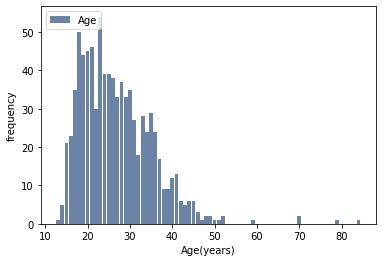

<Figure size 576x432 with 0 Axes>

In [350]:
# plotting histograms
hist_Age = thinkstats2.Hist(df_cancer.Age, label='Age')
thinkplot.Hist(hist_Age)
thinkplot.Show(xlabel='Age(years)', ylabel='frequency')

We can see from the histogram that there are some extreme values i.e. age > 55yrs. These are rare occurances. 

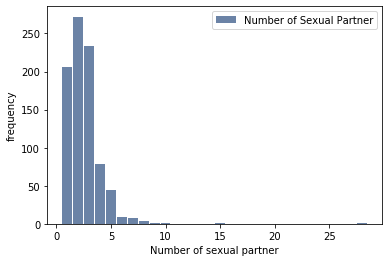

<Figure size 576x432 with 0 Axes>

In [351]:
hist_sexual_partner = thinkstats2.Hist(df_cancer['Number of sexual partners'], label='Number of Sexual Partner')
thinkplot.Hist(hist_sexual_partner)
thinkplot.Show(xlabel='Number of sexual partner', ylabel='frequency')

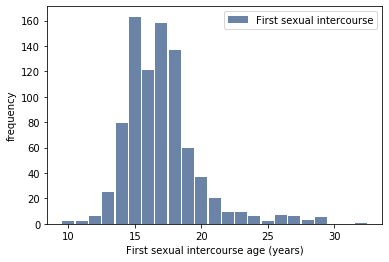

<Figure size 576x432 with 0 Axes>

In [352]:
hist_intercourse_age = thinkstats2.Hist(df_cancer['First sexual intercourse'], label='First sexual intercourse')
thinkplot.Hist(hist_intercourse_age)
thinkplot.Show(xlabel='First sexual intercourse age (years)', ylabel='frequency')

We can see from the histogram that there are some extreme values i.e. fisrt intercourse age > 30yrs. These are rare occurances.

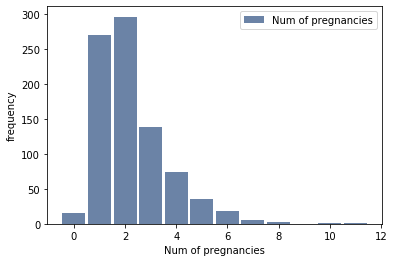

<Figure size 576x432 with 0 Axes>

In [353]:
hist_num_pregnancies = thinkstats2.Hist(df_cancer['Num of pregnancies'], label='Num of pregnancies')
thinkplot.Hist(hist_num_pregnancies)
thinkplot.Show(xlabel='Num of pregnancies', ylabel='frequency')

We can see from the histogram that there are some extreme values i.e. number of pregnancies > 9. These are rare occurances.

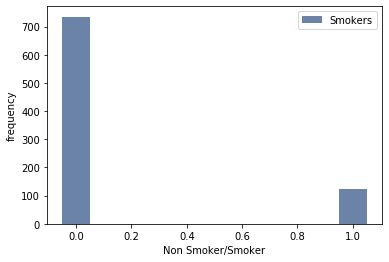

<Figure size 576x432 with 0 Axes>

In [354]:
hist_smokes = thinkstats2.Hist(df_cancer['Smokes'], label='Smokers')
thinkplot.Hist(hist_smokes, width=0.1)
thinkplot.Show(xlabel='Non Smoker/Smoker', ylabel='frequency')

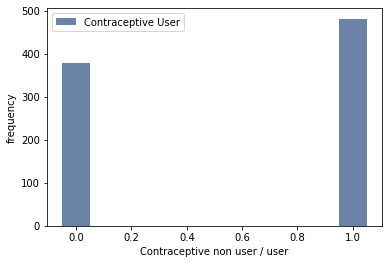

<Figure size 576x432 with 0 Axes>

In [355]:
hist_contra = thinkstats2.Hist(df_cancer['Hormonal Contraceptives'], label='Contraceptive User')
thinkplot.Hist(hist_contra,width=0.1)
thinkplot.Show(xlabel='Contraceptive non user / user', ylabel='frequency')

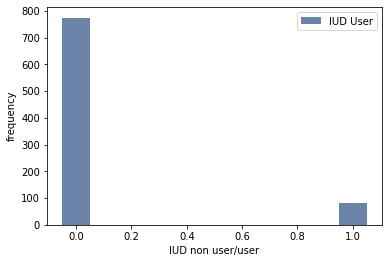

<Figure size 576x432 with 0 Axes>

In [356]:
hist_IUD = thinkstats2.Hist(df_cancer['IUD'], label='IUD User')
thinkplot.Hist(hist_IUD,width=0.1)
thinkplot.Show(xlabel='IUD non user/user', ylabel='frequency')

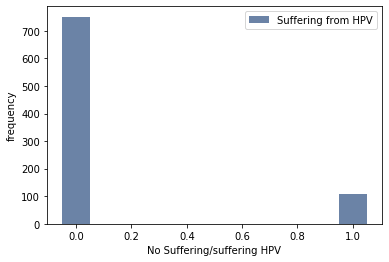

<Figure size 576x432 with 0 Axes>

In [357]:
hist_HPV = thinkstats2.Hist(df_cancer['STDs:HPV'], label='Suffering from HPV')
thinkplot.Hist(hist_HPV,width=0.1)
thinkplot.Show(xlabel='No Suffering/suffering HPV', ylabel='frequency')

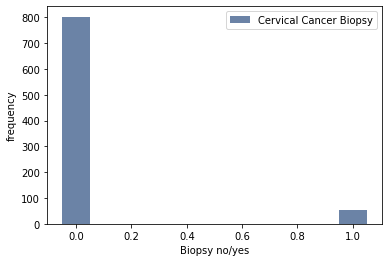

<Figure size 576x432 with 0 Axes>

In [358]:
hist_biopsy = thinkstats2.Hist(df_cancer['Biopsy'], label='Cervical Cancer Biopsy')
thinkplot.Hist(hist_biopsy,width=0.1)
thinkplot.Show(xlabel='Biopsy no/yes', ylabel='frequency')

In [359]:
#Mean, variance & standard deviation
mean_age = df_cancer.Age.mean()
var_age = df_cancer.Age.var()
std_age = df_cancer.Age.std()
print("Age mean is:", mean_age)
print("Age variance is:", var_age)
print("Age standard deviation is:", std_age)

mean_sex_partner = df_cancer["Number of sexual partners"].mean()
var_sex_partner = df_cancer["Number of sexual partners"].var()
std_sex_partner = df_cancer["Number of sexual partners"].std()
print("\nNumber of sexual partner mean is:", mean_sex_partner)
print("Number of sexual partner variance is:", var_sex_partner)
print("Number of sexual partner standard deviation is:", std_sex_partner)

mean_first_intrcrse = df_cancer["First sexual intercourse"].mean()
var_first_intrcrse = df_cancer["First sexual intercourse"].var()
std_first_intrcrse = df_cancer["First sexual intercourse"].std()
print("\nFirst sexual intercourse mean is:", mean_first_intrcrse)
print("First sexual intercourse variance is:", var_first_intrcrse)
print("First sexual intercourse standard deviation is:", std_first_intrcrse)

mean_num_pregnancy = df_cancer["Num of pregnancies"].mean()
var_num_pregnancy = df_cancer["Num of pregnancies"].var()
std_num_pregnancy = df_cancer["Num of pregnancies"].std()
print("\nNum of pregnancies mean is:", mean_num_pregnancy)
print("Num of pregnancies variance is:", var_num_pregnancy)
print("Num of pregnancies standard deviation is:", std_num_pregnancy)

Age mean is: 26.82051282051282
Age variance is: 72.21512132363935
Age standard deviation is: 8.497948065482593

Number of sexual partner mean is: 2.541958041958042
Number of sexual partner variance is: 2.703605029742721
Number of sexual partner standard deviation is: 1.6442642822073104

First sexual intercourse mean is: 16.995337995337994
First sexual intercourse variance is: 7.794610679091469
First sexual intercourse standard deviation is: 2.791882998818444

Num of pregnancies mean is: 2.257575757575758
Num of pregnancies variance is: 1.9627488419787038
Num of pregnancies standard deviation is: 1.4009813853077078


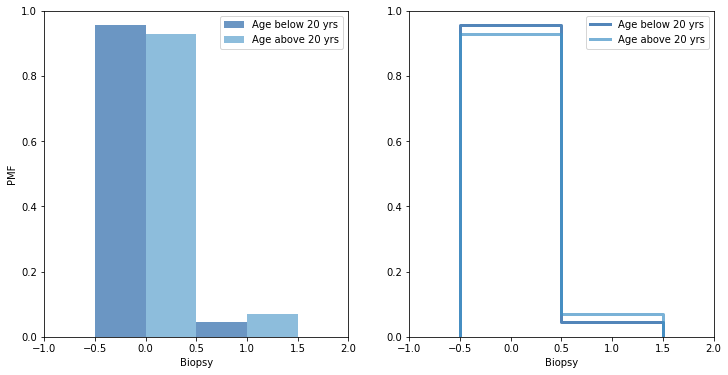

In [360]:
df_age_below20 = df_cancer[df_cancer.Age <= 20]  # select dataset for Age <=20
df_age_above20 = df_cancer[df_cancer.Age > 20]  # select dataset for Age > 20

below20_pmf = thinkstats2.Pmf(df_age_below20.Biopsy, label='Age below 20 yrs') #get pmf below 20yrs age
above20_pmf = thinkstats2.Pmf(df_age_above20.Biopsy, label='Age above 20 yrs') #get pmf abov 20yrs age

width=0.5 # width of the bar
axis = [-1,2, 0, 1] # x-axis and y-axis scale
thinkplot.PrePlot(2, cols=2) # pre select colour for 2 PMFs
thinkplot.Hist(below20_pmf, align='right', width=width) #plot
thinkplot.Hist(above20_pmf, align='left', width=width) #plot
thinkplot.Config(xlabel='Biopsy', ylabel='PMF', axis=axis) # set x and y-axis labels

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([below20_pmf, above20_pmf]) # plot
thinkplot.Config(xlabel='Biopsy', axis=axis)


We can see from above PMF plot that women older than 20 years have more chances of having Cervical Cancer than women below 20yrs of age.

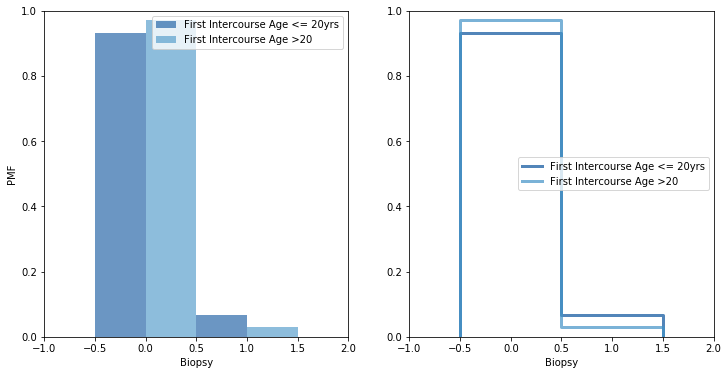

In [361]:
df_first_below20 = df_cancer[df_cancer["First sexual intercourse"] <= 20] #select dataset for intercpurse <=20
df_first_above20 = df_cancer[df_cancer["First sexual intercourse"] > 20] #select dataset for intercpurse >20

first_below20_pmf = thinkstats2.Pmf(df_first_below20.Biopsy, label='First Intercourse Age <= 20yrs') #pmf for first intercourse before 20
first_above20_pmf = thinkstats2.Pmf(df_first_above20.Biopsy, label='First Intercourse Age >20') #pmf for after intercourse after 20

width=0.5 #width of bar
axis = [-1,2, 0, 1] # scale
thinkplot.PrePlot(2, cols=2) # pre select colour for 2 PMFs
thinkplot.Hist(first_below20_pmf, align='right', width=width) # plot
thinkplot.Hist(first_above20_pmf, align='left', width=width) # plot
thinkplot.Config(xlabel='Biopsy', ylabel='PMF', axis=axis) # label x and y-axis

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_below20_pmf, first_above20_pmf]) #plot
thinkplot.Config(xlabel='Biopsy', axis=axis) # lable x-axis

We can see from above PMF plot that women who had intercourse before 20yrs,have more chances of having Cervical Cancer than women who had their first intercourse after 20yrs of age.

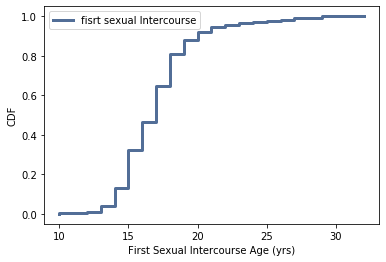

In [362]:
cdf = thinkstats2.Cdf(df_cancer["First sexual intercourse"], label='fisrt sexual Intercourse') # get CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='First Sexual Intercourse Age (yrs)', ylabel='CDF', loc='upper left') #plot

From the above CDF plot of First Sexual Intercourse age, we can see only 10% of the population had their first intercourse below 15 years and only 10% poulation had their first intercourse above 20 yeras. Most of the population had their first intercourse between 15years to 18years.

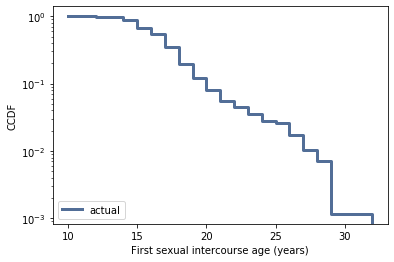

In [395]:
cdf = thinkstats2.Cdf(df_cancer["First sexual intercourse"], label='actual')
thinkplot.Cdf(cdf, complement=True) # complementary CDF
thinkplot.Config(xlabel='First sexual intercourse age (years)', ylabel='CCDF', yscale = 'log')

From the above plot of complementary CDF on a log-y scale we can see it is not a perfect stratight line. So we can say the exponential distribution model is not a perfect fit for fisr sexual intercourse age.

In [399]:
def SampleRows(df, nrows, replace=False):
    ''' pass a dataframe and number of records you want to select.
        it returns a random selection of records from the passed
        dataframe.
    '''
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [520]:
sample1 = SampleRows(df_cancer, 500) # select random 500 rows

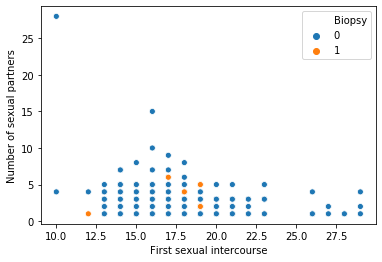

In [524]:
sb.scatterplot(x='First sexual intercourse',hue='Biopsy',y='Number of sexual partners',data=sample1) # seaborn plot

From the above scatter plot we can see woman having more than one sex partner and had their first intercourse between 17-19 years of age, are at more risk of having cervical cancer.

In [514]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [525]:
Cov(sample1.Biopsy, sample1["First sexual intercourse"]) # get covariance

-0.012460000000000004

In [526]:
Corr(sample1.Biopsy, sample1["First sexual intercourse"]) # get correlation

-0.017792160620194463

From the corelation and covariance value we can see there is a very weak negative relation between Biopsy and first sexual intercourse. i.e. who had their first inter course at later age, have less chance of getting Biposy (cervical cancer)

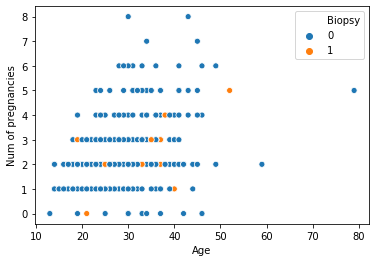

In [529]:
sb.scatterplot(x='Age',hue='Biopsy',y='Num of pregnancies',data=sample1) # seaborn plot

From the above scatter plot we can see woman having two or more pregnancies and aged between 32-37 years, are at more risk of having cervical cancer.

In [530]:
Cov(sample1.Biopsy, sample1.Age) # get covariance

0.0451

In [538]:
Corr(sample1.Biopsy, sample1.Age) # get correlation

0.021898036448931412

From the corelation and covariance value we can see there is a very weak positive relation between Biopsy and Age

In [539]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [546]:
for i in range (10):  # run a loop 20 times
    sample2 = SampleRows(df_cancer, 500) # select random 500 rows  
    data = sample2.Biopsy, sample.Age
    ht = CorrelationPermute(data)
    pvalue = ht.PValue()
    print("pvalue=", pvalue) # print the p-value

pvalue= 0.951
pvalue= 0.004
pvalue= 0.893
pvalue= 0.683
pvalue= 0.008
pvalue= 0.368
pvalue= 0.916
pvalue= 0.192
pvalue= 0.929
pvalue= 0.434


From the above correlation test, we got p-value < 0.05 only once. So we can say that Age has any impact on Biopsy is statistically insignificant.

In [571]:
import statsmodels.formula.api as smf
df_cancer["Number_of_sexual_partners"] = df_cancer["Number of sexual partners"]
df_cancer["First_Intercourse"] = df_cancer["First sexual intercourse"]
df_cancer["HPV"] = df_cancer["STDs:HPV"]

formula = 'Biopsy ~ Age+Smokes+IUD+Number_of_sexual_partners+First_Intercourse+HPV'
model = smf.ols(formula, data=df_cancer)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Biopsy   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.421
Date:                Sat, 29 Feb 2020   Prob (F-statistic):              0.204
Time:                        23:10:55   Log-Likelihood:                -6.1730
No. Observations:                 858   AIC:                             26.35
Df Residuals:                     851   BIC:                             59.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0537      0.057      0.948      0.343      -0.058       0.165
Age                           0.0012      0.001      1.017      0.309      -0.001       0.003
Smokes                        0.0224      0.025      0.904      0.366      -0.026       0.071
IUD                           0.0353      0.030      1.177      0.239      -0.024       0.094
Number_of_sexual_partners    -0.0023      0.005     -0.430      0.667      -0.013       0.008
First_Intercourse            -0.0009      0.003     -0.276      0.783      -0.007       0.006
HPV                          -0.0453      0.026     -1.769      0.077      -0.096       0.005
==============================================================================
Omnibus:                      626.287   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5667.553
Skew:                           3.506   Prob(JB):                         0.00
Kurtosis:                      13.457   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 is very low. So this multiple regression model is not a good fit.